In [47]:
# import Lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
df = pd.read_csv('/content/drive/My Drive/SIG/car data.csv')

In [50]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [51]:
df.drop('Car_Name',axis = 1,inplace=True)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [53]:
df.isna().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [54]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [55]:
df['Current_Year'] = 2020
df['Total_Year'] = df['Current_Year'] - df['Year']

In [56]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Total_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [57]:
df.drop(['Year','Current_Year'],axis=1,inplace=True)

In [58]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Total_Year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [59]:
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [60]:
df.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [61]:
df.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [62]:
df.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [63]:
df.Owner.value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

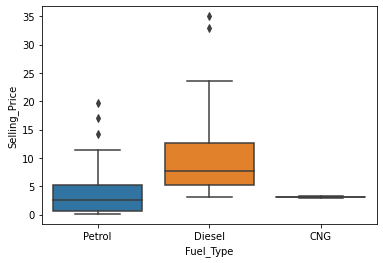

In [64]:
sns.boxplot(x = "Fuel_Type",y = "Selling_Price",data = df)

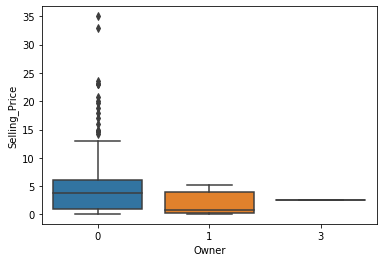

In [65]:
sns.boxplot(x = "Owner",y = "Selling_Price",data = df)

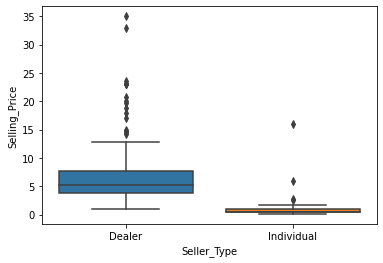

In [66]:
sns.boxplot(x = "Seller_Type",y = "Selling_Price",data = df)


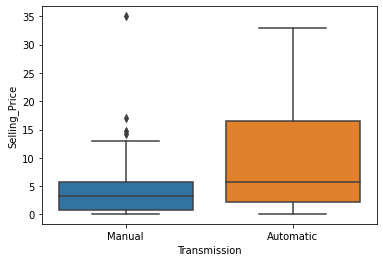

In [67]:
sns.boxplot(x = "Transmission",y = "Selling_Price",data=df)

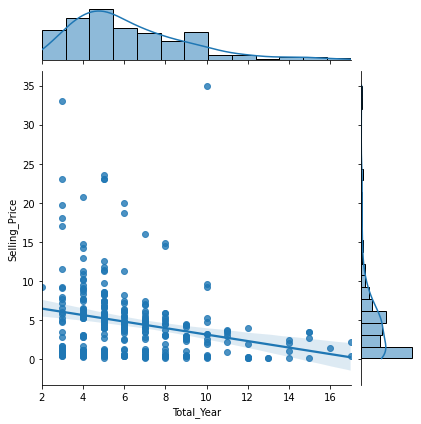

In [68]:
sns.jointplot(data=df, x="Total_Year", y="Selling_Price",  kind="reg")

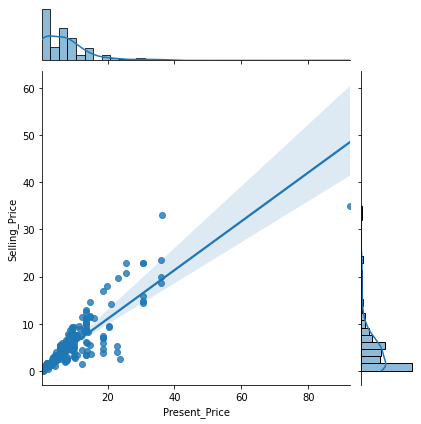

In [69]:
sns.jointplot(x="Present_Price", y="Selling_Price",data=df,kind="reg")

In [70]:
final_df = pd.get_dummies(df,drop_first=True)

In [71]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Total_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


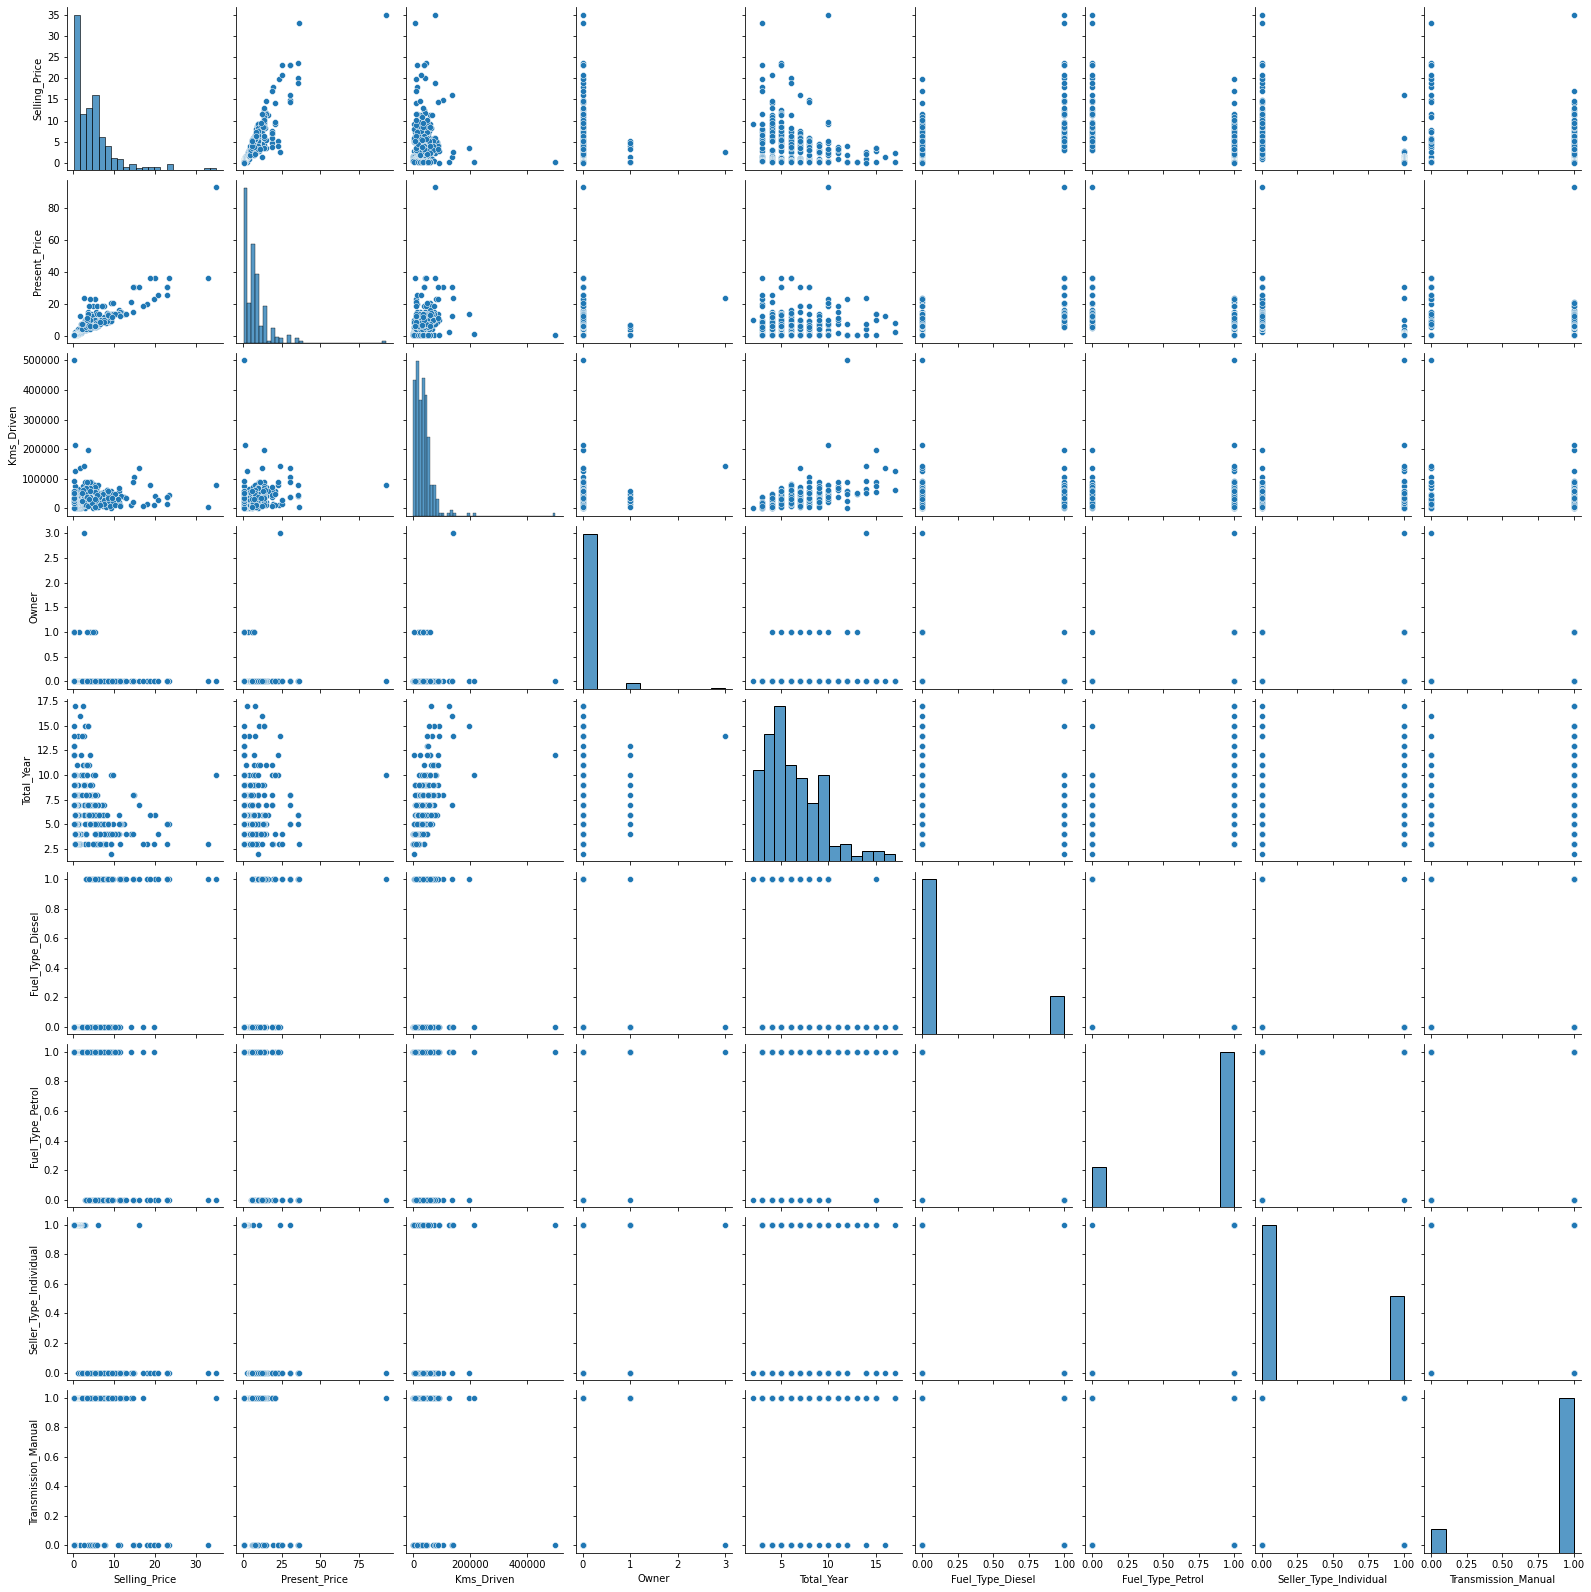

In [72]:
sns.pairplot(final_df)

In [73]:
final_df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Total_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Total_Year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


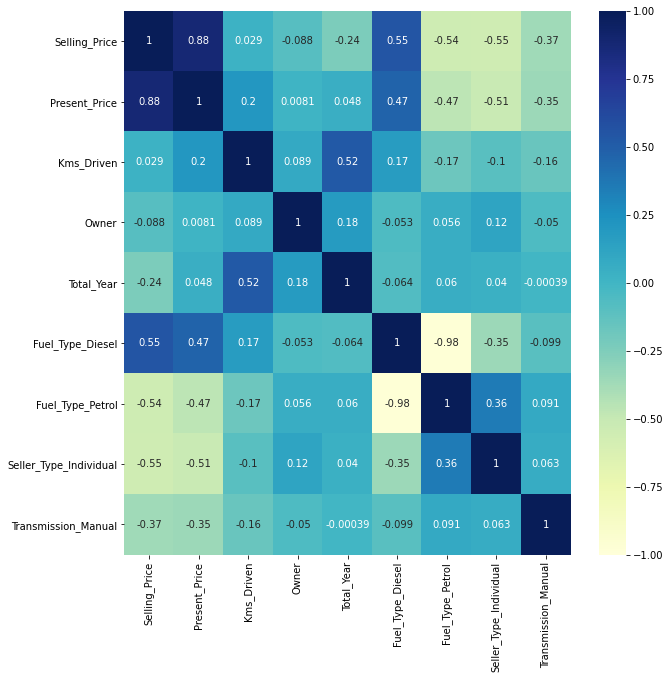

In [74]:
plt.figure(figsize=(10,10))
sns.heatmap(final_df.corr(),center=0,vmax=1,vmin=-1,cmap = "YlGnBu",annot=True)

In [75]:
# Ind
X = final_df.drop('Selling_Price',axis = 1)

In [76]:

X.head()

,Present_Price,Kms_Driven,Owner,Total_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [77]:
# Dep
y = final_df['Selling_Price']

In [78]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

In [80]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [81]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
predict = model.predict(X_test)

In [83]:
predict

array([ 2.81694613,  8.0219717 ,  6.62419684, -1.47967587,  8.9148687 ,
        7.56978311,  1.38917767,  0.86717897,  1.41044792,  7.63177508,
        9.19555785,  0.64644643,  8.08030103,  3.2484837 ,  7.04658891,
        3.08477422,  0.50276806, 10.48960716,  1.790244  ,  2.35595178,
        0.43104472,  8.22753486,  6.74700642,  2.6123948 ,  0.83761863,
        3.65227549,  5.20869408,  2.81058233,  2.16740557,  1.79302018,
        0.43706542,  9.24076007, -0.61127887,  2.27699949,  8.70260141,
        4.45151727,  7.13407408,  7.39391401,  2.91857092,  7.77380479,
        3.86541561,  4.11807969,  4.27231023,  0.68712811,  7.48017157,
        0.53829335,  7.18097683, 10.86798394,  3.11706539,  5.57073621,
        6.5295263 ,  2.19802144, 20.26328169, 16.70924352,  7.68557671,
        9.37259627,  4.40061883,  9.0803589 ,  1.78645146,  7.31552873,
        0.28862714, -2.43218949,  1.98384337, -1.49297453,  4.71951589,
        1.83428505, 19.93406836, 18.06338799,  5.34629227, -0.53

In [84]:
scr = model.score(X,y)
print("Score of the Linear Regression: ",scr*100)

Score of the Linear Regression:  88.04815822512757


In [85]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE: 1.2698356709065457
MSE: 3.5417485009491707
RMSE: 1.8819533737447298


In [86]:
X.head()

,Present_Price,Kms_Driven,Owner,Total_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [87]:
model.predict([[5.59,27000,0,6,0,1,0,1]])

array([3.89904307])

In [88]:
pre = str(model.predict([[5.59,27000,0,6,0,1,0,1]]))

print("""
Now we wil predict the price from our model 
-------------------------------------------
input parameters:\n 
\t Present_price: 5.59\n
\t KMS_DRIVEN   : 27000\n
\t Fuel_Type    : Petrol\n
\t Seller_Type  : Dealer\n
\t Transmission : Manual\n
\t Owner type   : 0\n
\t Total_Year   : 6\n
-------------------------------------------
\t Prediction   :""",pre[1:4])


Now we wil predict the price from our model 
-------------------------------------------
input parameters:
 
	 Present_price: 5.59

	 KMS_DRIVEN   : 27000

	 Fuel_Type    : Petrol

	 Seller_Type  : Dealer

	 Transmission : Manual

	 Owner type   : 0

	 Total_Year   : 6

-------------------------------------------
	 Prediction   : 3.8


In [89]:
import pickle
# open a file where you ant to store the data
file = open("car_model_api.pkl","wb")

# Dump information 
pickle.dump(model,file)

# Desition tree regration

In [90]:
from sklearn.tree import DecisionTreeRegressor

In [100]:
model_dt = DecisionTreeRegressor(random_state=0)
model_dt.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [101]:
y_pred = model_dt.predict(X_test)

In [102]:
y_pred

array([ 0.5 , 11.25,  5.2 ,  0.2 ,  7.05,  5.95,  0.65,  0.5 ,  0.5 ,
        7.2 ,  7.25,  1.  ,  4.5 ,  0.45,  5.95,  2.35,  1.25, 18.  ,
        0.5 ,  1.75,  0.25,  8.75,  4.75,  2.7 ,  0.45,  4.5 ,  5.25,
        2.95,  1.11,  1.11,  0.55, 11.25,  0.45,  2.25,  7.75,  3.9 ,
        5.85,  5.9 ,  2.55,  5.9 ,  3.6 ,  2.75,  3.45,  0.6 ,  6.5 ,
        1.  ,  8.5 ,  4.  ,  2.7 ,  4.75,  4.5 ,  1.45, 23.  , 20.75,
        5.95,  9.15,  5.25,  7.75,  2.25,  6.4 ,  0.25,  0.2 ,  0.9 ,
        0.55,  4.  ,  1.05, 18.75, 23.  ,  6.4 ,  0.55,  3.9 ,  2.95,
        6.1 ,  4.5 ,  2.75,  1.  ,  0.8 ,  8.65,  0.35,  8.65,  5.3 ,
        2.95,  4.35, 18.  ,  2.55,  0.45,  1.2 ,  2.25,  0.48, 14.9 ,
        1.11])

In [103]:
model_dt.score(X_test,y_test)

0.966480317816943

# Random Forest

In [115]:
from sklearn.ensemble import RandomForestRegressor

In [126]:
model_rf = RandomForestRegressor(n_estimators=100,random_state=0)

In [127]:
model_rf.fit(X_test,y_test)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [128]:
y_pred = model_rf.predict(X_test)

In [129]:
y_pred

array([ 0.3545, 10.1034,  5.0655,  0.2053,  7.0718,  7.229 ,  1.12  ,
        0.5672,  0.4442,  6.6275,  9.5527,  1.0945,  7.6399,  0.443 ,
        5.9431,  2.9745,  1.0165, 14.5326,  0.4687,  1.524 ,  0.4441,
        8.2465,  5.3496,  3.0685,  0.5625,  3.453 ,  5.3612,  2.763 ,
        1.2195,  1.188 ,  0.5557,  7.6575,  0.4921,  2.2603,  7.984 ,
        3.8426,  5.526 ,  4.9207,  2.808 ,  4.9623,  3.5898,  2.2639,
        4.426 ,  0.3992,  6.905 ,  0.6683,  7.0722,  8.5441,  3.6235,
        3.182 ,  5.6462,  1.313 , 22.8476, 21.8277,  7.693 , 10.2461,
        5.212 ,  9.0166,  2.3419,  7.3066,  0.327 ,  0.2798,  0.6972,
        0.2652,  4.1216,  1.1635, 21.0667, 22.388 ,  6.501 ,  0.3736,
        3.1855,  4.1996,  5.5255,  4.2295,  2.6655,  1.155 ,  0.7007,
       10.6076,  0.2493,  9.3046,  5.038 ,  3.004 ,  3.33  , 18.1836,
        2.883 ,  0.4467,  1.125 ,  3.4045,  0.2974, 16.8307,  1.1405])

In [130]:
model_rf.score(X_test,y_test)

0.9860060331338866

# Suport Vector Regration

In [131]:
from sklearn.svm import SVR

In [132]:
model_svm = SVR(kernel='rbf' )

In [134]:
model_svm.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [137]:
y_pred = model_svm.predict(X_test)

In [138]:
y_pred

array([3.35858208, 2.29267475, 4.4340741 , 4.06491857, 4.28269707,
       4.35997069, 3.50635446, 2.04570672, 2.54660099, 4.42615918,
       1.58070841, 3.95806787, 2.63075901, 1.52395662, 4.42615882,
       4.33632129, 2.3362493 , 2.10318532, 2.09494389, 1.53125987,
       2.3782359 , 2.99886839, 3.9194341 , 3.04481416, 3.43334425,
       4.0649217 , 4.48053537, 4.37778622, 2.29434401, 2.88117006,
       2.71467355, 4.37325429, 3.57747975, 4.46501262, 4.37778917,
       4.06492202, 4.11415883, 4.39531129, 4.47862925, 4.49533882,
       4.0119483 , 2.53376879, 2.96342916, 4.34908332, 3.98189714,
       3.90066485, 4.28719792, 3.83527161, 3.77832836, 4.50325766,
       4.12365468, 1.73461392, 4.46259329, 2.630765  , 4.40809251,
       3.82553946, 1.7650506 , 4.01220855, 4.49807596, 2.63571698,
       3.7783264 , 3.50635338, 1.68845037, 4.49533058, 4.11422556,
       2.10317827, 4.31738581, 4.28266643, 2.94671521, 4.01194432,
       4.50203837, 4.49533427, 3.68498398, 4.3015677 , 3.33651

In [139]:
model_svm.score(X_test,y_test)

-0.07759038062463475

# polymomial regration 


In [148]:
from sklearn.preprocessing import PolynomialFeatures

In [149]:
model_poly = PolynomialFeatures(degree=5)

In [150]:
X_poly = model_poly.fit_transform(X_train)

In [151]:
model_poly_linear = LinearRegression()

In [152]:
model_poly_linear.fit(X_poly,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [155]:
y_pred = model_poly_linear.predict(X_test)

ValueError: ignored

In [156]:
model_poly_linear.score(X_test,y_test)

ValueError: ignored